Visualize images / kernels via the XOR problem

In [345]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [364]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [365]:
from targprop import *
from toy_data import *

In [366]:
data = xor_data()

In [396]:
ww.shape

(16, 2, 2)

In [420]:
W1 = np.random.rand(2, 2)
W2 = np.random.rand(2, 2)

eps = 0.15
d = 2j
w11, w12, w21, w22 = np.mgrid[-eps:eps:d, -eps:eps:d, -eps:eps:d, -eps:eps:d]

ww = np.array([[w11.ravel(), w12.ravel()],[w21.ravel(), w22.ravel()]]).transpose([2, 0, 1])
ww = eps*np.random.randn(500, 2, 2)
W1 = W1[np.newaxis,:,:] + ww
W2 = W2[np.newaxis,:,:] + ww

In [421]:
x0 = data.inputs*0.85
x1 = np.reshape(np.matmul(x0, W1), [-1, 2])
z1 = relu(x1)
x2 = np.reshape(np.matmul(z1, W2), [-1, 2])
z2 = relu(x2)

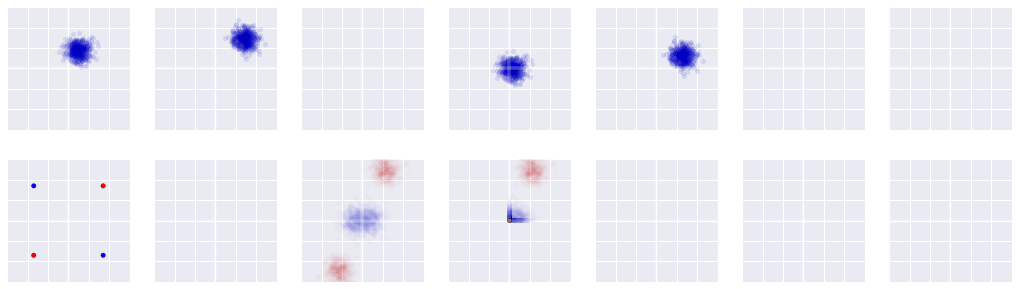

In [424]:
fig, ax = plt.subplots(2, 7, figsize=(18,5))
for i in range(14):
  square_axes(fig, i)

cmap = ['red','blue','red','blue']
ax[1,0].scatter(x0[:,0], x0[:,1], c=cmap)

ax[0,0].scatter(W1[:,0,0], W1[:,1,0], alpha=0.1)
ax[0,1].scatter(W1[:,0,1], W1[:,1,1], alpha=0.1)

ax[1,2].scatter(x1[:,0], x1[:,1], c=cmap, alpha=0.01)
ax[1,3].scatter(z1[:,0], z1[:,1], c=cmap, alpha=0.01)

ax[0,3].scatter(W2[:,0,0], W2[:,1,0], alpha=0.1)
ax[0,4].scatter(W2[:,0,1], W2[:,1,1], alpha=0.1)

#ax[1,5].scatter(x2[:,0], x2[:,1], c=cmap, alpha=0.0025)
#ax[1,6].scatter(z2[:,0], z2[:,1], c=cmap, alpha=0.0025)

plt.show()